In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix,identity
import seaborn

In [0]:
def is_house_box(x_pos, y_pos, x, y):
  return (x_pos < x and x < x_pos + 18 and y_pos < y and y < y_pos + 18)


def is_houses_1(x_pos, y_pos, x, y):
  if x_pos < x and x < x_pos+18 and y_pos < y and y < y_pos+78:
    return True
  x_pos = x_pos - 12
  y_pos = y_pos + 60
  return (x_pos < x and x < x_pos + 13 and y_pos < y and y < y_pos + 18)


def is_houses_2(x_pos, y_pos, x, y):
  if x_pos < x and x < x_pos + 18 and y_pos < y and y < y_pos + 78:
    return True
  x_pos = x_pos + 12
  return (x_pos < x and x < x_pos + 12 and y_pos < y and y < y_pos + 18)


def houses_check(x,y):
  boxes = [
    (69,  111),  (69, 264),
    (138, 12),  (138, 165),
    (192, 111), (192, 264),
    (261, 12),  (261, 165)
  ]

  houses_2 = [
    (69,  12),  (69, 165),
    (192, 12), (192, 165)
  ]
  
  houses_1 = [        
    (138, 51), (138, 204),
    (261, 51), (261, 204)
  ]

  for box in boxes:
    if is_house_box(box[0], box[1], x, y):
      return True

  for house in houses_1:
    if is_houses_1(house[0],house[1],x,y):
      return True
  
  for house in houses_2:
    if is_houses_2(house[0],house[1],x,y):
      return True
  return False


In [0]:
def solve(steps): 
  eps = 1e-7  
  k = 0.5
  lambda_1 = 1.0
  lambda_2 = 0
  M = 300
  h = 1 / M
  tau = (h * h) / (4 * k)
  MM = M * M

  x = np.zeros((MM, 1))
  for i in range(M):
    x[i] = 1
        
  dx = [1, -1, 0, 0]
  dy = [0, 0, 1, -1]
  
  coeffs = [
    tau*(k / (h**2) - lambda_1 / (2*h)),
    tau*(k / (h**2) + lambda_1 / (2*h)),
    tau*(k / (h**2) - lambda_2 / (2*h)),
    tau*(k / (h**2) + lambda_2 / (2*h))
  ]

  A, b = lil_matrix((MM, MM)), np.zeros(MM)
  for i in range(0, M): 
    for e in range(0, M):
      ind = i * M + e
      A[ind, ind] = 1-4 * (tau*k) / (h**2)
      for j in range(0, 4):
        x1, y1 = i + dx[j], e + dy[j]
        coeff = coeffs[j]
        if x1 == 0:
          b[ind] -= coeff
        elif houses_check(x1, y1) or (x1 > M-1 or y1 > M-1 or y1 == 0):
          A[ind,ind] += coeff
        else:
          A[ind, x1*M + y1] = coeff

  A, b = csr_matrix(A), b.reshape(MM, -1)
  for i in range(steps):
    x_new = (A * x + b)
    if np.max(np.abs(x_new - x)) < eps:
      break
    x = x_new

  return 1 - x.reshape((M, M)).T


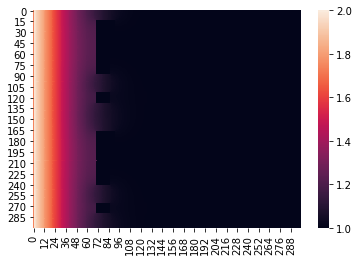

In [18]:
u = solve(3500)
seaborn.heatmap(u)

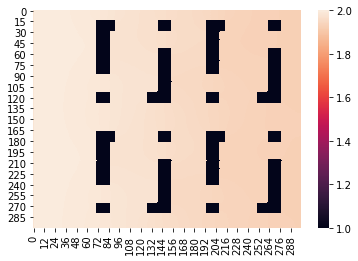

In [19]:
u = solve(350000)
seaborn.heatmap(u)